### Importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
# Visualization
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus
# XGBoost
from xgboost import XGBClassifier
# RandomForest
from sklearn.ensemble import RandomForestClassifier
# Support Vector Machine Classifier
from sklearn.svm import SVC
# K-Nearest Neighbor
from sklearn.neighbors import KNeighborsClassifier
# Accuracy
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

C:\Users\Richa\anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


#### Data

In [3]:
data=pd.read_csv("D:/My files/Projects/Project DryBean Classifier/DryBeanDataset/Dry_Bean_Dataset.csv")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [5]:
data.head()

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272751  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358      0.007332      0.003147      0.834222      0.998724  SEKER  
1     0.953861      0.006979      0.003564      0.909851      0.998430  SEKER  
2     0.908774      0.007244      0.003048      0.825871      0.999066  SEKER  
3     0.928329      0.007017      0.003215      0.861794      0.994199  SEKER  
4     0.970516      0.006697      0.003665      0.941900      0.999166  SEKER

In [6]:
data['Class']=data['Class'].astype('category')

In [7]:
data['Class'].value_counts()

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

In [8]:
X = data.drop("Class",axis=1)
y = data.Class

In [9]:
feature_cols = X.columns.values
feature_cols

array(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter',
       'Extent', 'Solidity', 'roundness', 'Compactness', 'ShapeFactor1',
       'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4'], dtype=object)

#### Standardizing the Data

In [10]:
X_scaled = StandardScaler().fit_transform(X)
X_scaled = pd.DataFrame(X_scaled)
X_scaled.columns=feature_cols
X_scaled.head()

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0 -0.840749  -1.143319        -1.306598        -0.631153     -1.565053   
1 -0.829188  -1.013924        -1.395911        -0.434445     -1.969784   
2 -0.807157  -1.078829        -1.252357        -0.585735     -1.514291   
3 -0.785741  -0.977215        -1.278825        -0.439290     -1.741618   
4 -0.781239  -1.097384        -1.380471        -0.266663     -2.117993   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0     -2.185720   -0.841451      -1.063341  0.289087  0.367614   1.423867   
1     -3.686040   -0.826102      -1.044217  0.697477 -0.462907   0.231054   
2     -2.045336   -0.808704      -1.008084  0.578195  0.518417   1.252865   
3     -2.742211   -0.773975      -0.973337  0.671260 -2.241767   0.515049   
4     -4.535028   -0.784286      -0.966080  0.476020  0.804772   1.874992   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  
0     1.839116      0.680786      2.402173      1.925723      0.838371  
1     2.495449      0.367967      3.100894      2.689702      0.771138  
2     1.764843      0.603129      2.235091      1.841356      0.916755  
3     2.081715      0.401718      2.515075      2.204250     -0.197985  
4     2.765330      0.118268      3.270983      3.013462      0.939640

### PCA for dimentionality reduction

In [11]:
pca = PCA(0.99)
x_pca = pca.fit_transform(X_scaled)
x_pca = pd.DataFrame(x_pca)
x_pca.head()

0         1         2         3         4         5         6
0 -4.981561  1.824697  0.749021 -0.390812 -0.033531  0.301212  0.610269
1 -5.436792  2.932365  2.182374 -0.431960  1.226464  0.045575  1.691342
2 -4.758088  1.826884  0.514038 -0.125854  0.131505  0.208538  0.599563
3 -4.300541  2.003661  3.554447  0.082964  0.800766  0.502323  0.659708
4 -6.349340  4.088205  1.179199 -0.830357 -0.037073 -0.278306  1.728546

In [12]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.55466439, 0.26430973, 0.08006564, 0.0511408 , 0.02739293,
       0.01149761, 0.00697651])

In [13]:
n_pcs= pca.components_.shape[0]
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]
most_important_names = [feature_cols[most_important[i]] for i in range(n_pcs)]

In [14]:
x_pca.columns = most_important_names
x_pca.head()

MajorAxisLength  MinorAxisLength  Solidity    Extent  roundness  \
0        -4.981561         1.824697  0.749021 -0.390812  -0.033531   
1        -5.436792         2.932365  2.182374 -0.431960   1.226464   
2        -4.758088         1.826884  0.514038 -0.125854   0.131505   
3        -4.300541         2.003661  3.554447  0.082964   0.800766   
4        -6.349340         4.088205  1.179199 -0.830357  -0.037073   

   ShapeFactor1  Eccentricity  
0      0.301212      0.610269  
1      0.045575      1.691342  
2      0.208538      0.599563  
3      0.502323      0.659708  
4     -0.278306      1.728546

In [15]:
feature_cols=most_important_names.copy()
feature_cols

['MajorAxisLength',
 'MinorAxisLength',
 'Solidity',
 'Extent',
 'roundness',
 'ShapeFactor1',
 'Eccentricity']

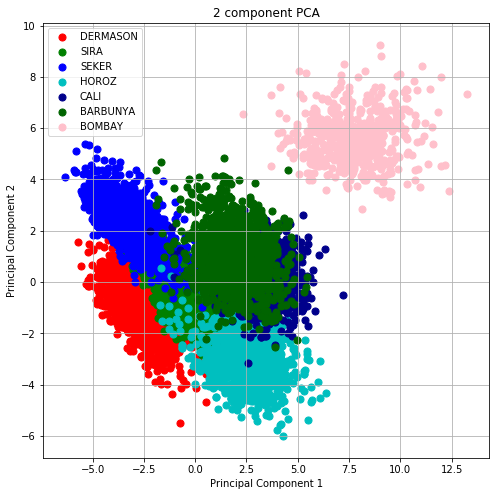

In [16]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('2 component PCA')
targets = ['DERMASON','SIRA','SEKER','HOROZ','CALI','BARBUNYA','BOMBAY']
colors = ['r','g','b','c','DarkBlue','DarkGreen','pink']
for target, color in zip(targets,colors):
    indicesToKeep = data['Class'] == target
    ax.scatter(x_pca.loc[indicesToKeep, 'MajorAxisLength'], x_pca.loc[indicesToKeep, 'MinorAxisLength'], c = color, s = 50)
ax.legend(targets)
ax.grid()

#### Covariance Matrix Computation

In [17]:
y_F = y.cat.codes
result = pd.concat([x_pca, y_F], axis=1)
most_important_names.append("Class")
result.columns=most_important_names
corr=result.corr()
corr

MajorAxisLength  MinorAxisLength      Solidity        Extent  \
MajorAxisLength     1.000000e+00     8.767472e-17 -2.782017e-17  9.814796e-17   
MinorAxisLength     8.767472e-17     1.000000e+00 -2.599955e-17 -7.712165e-17   
Solidity           -2.782017e-17    -2.599955e-17  1.000000e+00 -8.029912e-17   
Extent              9.814796e-17    -7.712165e-17 -8.029912e-17  1.000000e+00   
roundness           2.156851e-18     5.594270e-17  8.964514e-16 -8.212900e-17   
ShapeFactor1        1.756040e-16     6.957946e-16  3.037048e-16  3.430347e-16   
Eccentricity        3.453099e-16    -7.096797e-17 -1.297459e-17  1.787525e-16   
Class              -4.504277e-01    -1.886048e-01 -1.187294e-01 -3.232519e-03   

                    roundness  ShapeFactor1  Eccentricity     Class  
MajorAxisLength  2.156851e-18  1.756040e-16  3.453099e-16 -0.450428  
MinorAxisLength  5.594270e-17  6.957946e-16 -7.096797e-17 -0.188605  
Solidity         8.964514e-16  3.037048e-16 -1.297459e-17 -0.118729  
Extent          -8.212900e-17  3.430347e-16  1.787525e-16 -0.003233  
roundness        1.000000e+00 -2.133373e-16 -5.692970e-17 -0.275448  
ShapeFactor1    -2.133373e-16  1.000000e+00  1.361263e-16 -0.203071  
Eccentricity    -5.692970e-17  1.361263e-16  1.000000e+00  0.050128  
Class           -2.754482e-01 -2.030707e-01  5.012808e-02  1.000000

### Train test split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.3, random_state=1)

### Decision Tree

In [19]:
dt = DecisionTreeClassifier()
dt = dt.fit(X_train,y_train)
y_pred1 = dt.predict(X_test)

In [20]:
print("Accuracy:",accuracy_score(y_test, y_pred1))

Accuracy: 0.8944662095984329


In [21]:
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data, filled=True, rounded=True, special_characters=True, 
                class_names=['DERMASON','SIRA','SEKER','HOROZ','CALI','BARBUNYA','BOMBAY'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('D:/My files/Projects/Project DryBean Classifier/decisiontree.png')
Image(graph.create_png())

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.502878 to fit

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.502878 to fit



In [22]:
print("Confusion Matrix: ")
print(confusion_matrix(y_test,y_pred1))

Confusion Matrix: 
[[340   1  30   0   4   5  10]
 [  3 150   0   0   0   0   0]
 [ 33   0 425   0  16   1   4]
 [  1   0   0 964   3  11  83]
 [  6   0  13   5 540   0  15]
 [  4   0   3  22   0 574  18]
 [  4   0   4 100  19  13 660]]


In [23]:
print("Classification Report:")
print(classification_report(y_test,y_pred1))

Classification Report:
              precision    recall  f1-score   support

    BARBUNYA       0.87      0.87      0.87       390
      BOMBAY       0.99      0.98      0.99       153
        CALI       0.89      0.89      0.89       479
    DERMASON       0.88      0.91      0.90      1062
       HOROZ       0.93      0.93      0.93       579
       SEKER       0.95      0.92      0.94       621
        SIRA       0.84      0.82      0.83       800

    accuracy                           0.89      4084
   macro avg       0.91      0.90      0.91      4084
weighted avg       0.89      0.89      0.89      4084



### XGBoost

In [24]:
xgb = XGBClassifier()

# fit the model with the training data
xgb.fit(X_train,y_train)

# predict the target on the test dataset
y_pred2 = xgb.predict(X_test)

# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test,y_pred2)
print('\naccuracy_score on test dataset : ', accuracy_test)

C:\Users\Richa\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:37:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

accuracy_score on test dataset :  0.9289911851126347


In [25]:
print("Confusion Matrix: ")
print(confusion_matrix(y_test,y_pred2))

Confusion Matrix: 
[[358   0  18   1   2   2   9]
 [  0 153   0   0   0   0   0]
 [ 15   0 452   0   9   1   2]
 [  1   0   0 997   1   6  57]
 [  1   0   9   3 552   0  14]
 [  2   0   0  16   0 585  18]
 [  3   0   2  79  11   8 697]]


In [26]:
print("Classification Report:")
print(classification_report(y_test,y_pred2))

Classification Report:
              precision    recall  f1-score   support

    BARBUNYA       0.94      0.92      0.93       390
      BOMBAY       1.00      1.00      1.00       153
        CALI       0.94      0.94      0.94       479
    DERMASON       0.91      0.94      0.92      1062
       HOROZ       0.96      0.95      0.96       579
       SEKER       0.97      0.94      0.96       621
        SIRA       0.87      0.87      0.87       800

    accuracy                           0.93      4084
   macro avg       0.94      0.94      0.94      4084
weighted avg       0.93      0.93      0.93      4084



### Random Forest

In [27]:
y_trainF = y_train.copy()
y_trainF = y_trainF.cat.codes
y_testF = y_test.copy()
y_testF = y_testF.cat.codes

In [28]:
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf = rf.fit(X_train, y_trainF)

In [29]:
y_pred3 = rf.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_testF, y_pred3))
print('Mean Squared Error:', metrics.mean_squared_error(y_testF, y_pred3))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_testF, y_pred3)))

Mean Absolute Error: 0.1946620959843291
Mean Squared Error: 0.5903525954946132
Root Mean Squared Error: 0.7683440606229823


In [30]:
print("Confusion Matrix: ")
print(confusion_matrix(y_testF,y_pred3))

Confusion Matrix: 
[[359   0  17   1   1   1  11]
 [  0 153   0   0   0   0   0]
 [ 15   0 451   0   9   1   3]
 [  0   0   0 992   1   8  61]
 [  1   0  11   3 554   0  10]
 [  3   0   0  17   0 581  20]
 [  2   0   0  84  15   8 691]]


In [31]:
print("Classification Report:")
print(classification_report(y_testF,y_pred3))

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       390
           1       1.00      1.00      1.00       153
           2       0.94      0.94      0.94       479
           3       0.90      0.93      0.92      1062
           4       0.96      0.96      0.96       579
           5       0.97      0.94      0.95       621
           6       0.87      0.86      0.87       800

    accuracy                           0.93      4084
   macro avg       0.94      0.94      0.94      4084
weighted avg       0.93      0.93      0.93      4084



In [32]:
print("Accuracy Score:", accuracy_score(y_testF, y_pred3))

Accuracy Score: 0.9258080313418218


#### Visualizing a Single Decision Tree
##### One of the coolest parts of the Random Forest implementation in Skicit-learn is we can actually examine any of the trees in the forest. We will select one tree, and save the whole tree as an image.

In [33]:
tree = rf.estimators_[5]
dot_data1 = StringIO()
export_graphviz(tree, out_file = dot_data1, rounded = True, precision = 1, special_characters=True, 
                class_names=['DERMASON','SIRA','SEKER','HOROZ','CALI','BARBUNYA','BOMBAY'])
graph = pydotplus.graph_from_dot_data(dot_data1.getvalue())
# Write graph to a png file
graph.write_png('D:/My files/Projects/Project DryBean Classifier/rftree.png')
Image(graph.create_png())

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.575921 to fit

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.575921 to fit



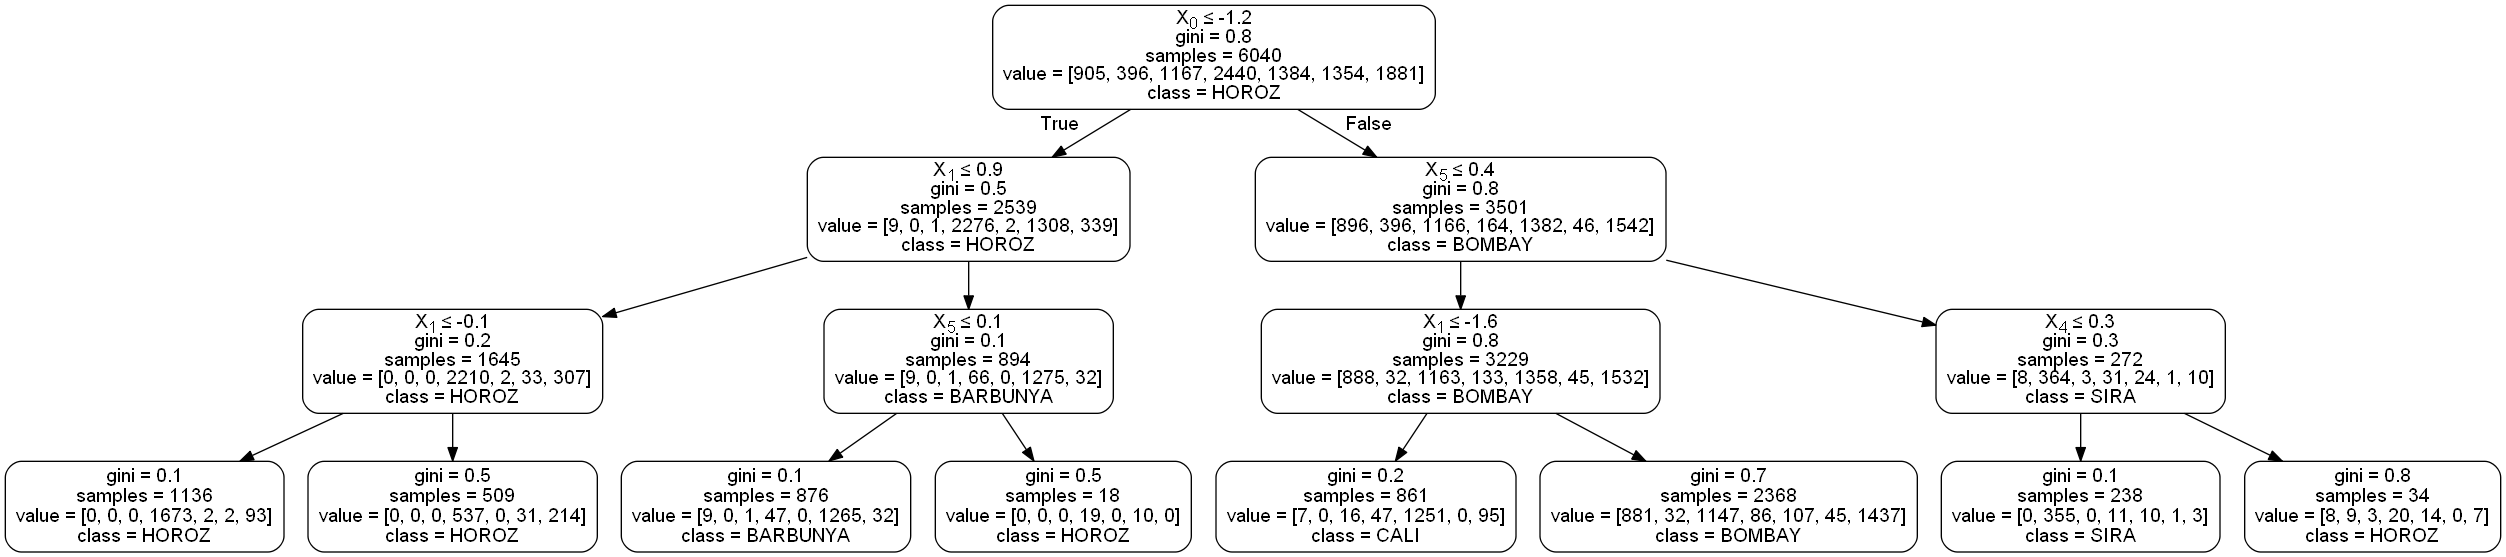

In [34]:
# Limit depth of tree to 3 levels
rf_small = RandomForestClassifier(n_estimators=10, max_depth = 3)
rf_small.fit(X_train, y_trainF)
# Extract the small tree
tree_small = rf_small.estimators_[5]
# Save the tree as a png image
dot_data2 = StringIO()
export_graphviz(tree_small, out_file = dot_data2, rounded = True, precision = 1, special_characters=True, 
                class_names=['DERMASON','SIRA','SEKER','HOROZ','CALI','BARBUNYA','BOMBAY'])
graph = pydotplus.graph_from_dot_data(dot_data2.getvalue())
# Write graph to a png file
graph.write_png('D:/My files/Projects/Project DryBean Classifier/rftreesmall.png')
Image(graph.create_png())

### Support Vector Machine Classifier

In [35]:
sv = SVC()
sv.fit(X_train,y_train)
y_pred4 = sv.predict(X_test)
print(accuracy_score(y_test,y_pred4))

0.9277668952007836


In [36]:
print("Confusion Matrix: ")
print(confusion_matrix(y_test,y_pred4))

Confusion Matrix: 
[[356   0  19   0   1   2  12]
 [  0 153   0   0   0   0   0]
 [ 13   0 456   0   6   1   3]
 [  0   0   0 989   0  11  62]
 [  0   0   7   4 556   0  12]
 [  3   0   0  13   0 587  18]
 [  1   0   0  86  12   9 692]]


In [37]:
print("Classification Report:")
print(classification_report(y_test,y_pred4))

Classification Report:
              precision    recall  f1-score   support

    BARBUNYA       0.95      0.91      0.93       390
      BOMBAY       1.00      1.00      1.00       153
        CALI       0.95      0.95      0.95       479
    DERMASON       0.91      0.93      0.92      1062
       HOROZ       0.97      0.96      0.96       579
       SEKER       0.96      0.95      0.95       621
        SIRA       0.87      0.86      0.87       800

    accuracy                           0.93      4084
   macro avg       0.94      0.94      0.94      4084
weighted avg       0.93      0.93      0.93      4084



### K-Nearest Neighbor

Text(0, 0.5, 'Mean Error')

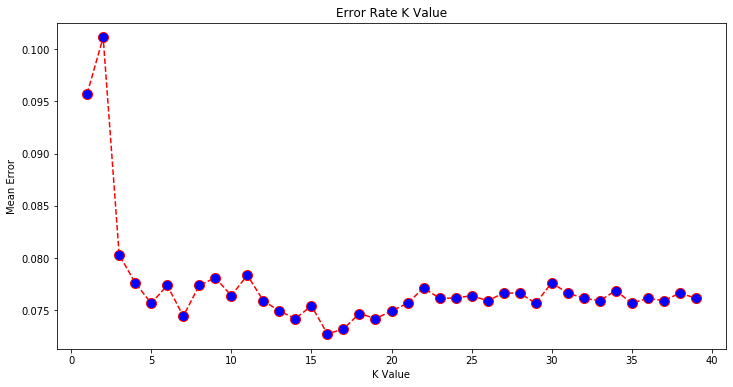

In [38]:
# Comparing Error Rate with the K Value
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [39]:
# Taking value of n_neighbors = 7
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train, y_train)
y_pred5 = knn.predict(X_test)
print(accuracy_score(y_test,y_pred5))

0.9255631733594515


In [40]:
print("Confusion Matrix: ")
print(confusion_matrix(y_test,y_pred5))

Confusion Matrix: 
[[353   0  21   0   1   2  13]
 [  0 153   0   0   0   0   0]
 [ 11   0 458   0   8   1   1]
 [  0   0   0 991   2   9  60]
 [  0   0   7   4 556   0  12]
 [  3   0   0  21   0 578  19]
 [  1   0   1  83  15   9 691]]


In [41]:
print("Classification Report:")
print(classification_report(y_test,y_pred5))

Classification Report:
              precision    recall  f1-score   support

    BARBUNYA       0.96      0.91      0.93       390
      BOMBAY       1.00      1.00      1.00       153
        CALI       0.94      0.96      0.95       479
    DERMASON       0.90      0.93      0.92      1062
       HOROZ       0.96      0.96      0.96       579
       SEKER       0.96      0.93      0.95       621
        SIRA       0.87      0.86      0.87       800

    accuracy                           0.93      4084
   macro avg       0.94      0.94      0.94      4084
weighted avg       0.93      0.93      0.93      4084

